In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Loading the dataset
df = pd.read_excel("Combine_Stock_Histry - Copy.xlsx")

# View of the first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2017-07-08 00:00:00,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
1,2017-08-08 00:00:00,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL
2,2017-09-08 00:00:00,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL
3,2017-10-08 00:00:00,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL
4,2017-11-08 00:00:00,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL


# Data Preparation

In [3]:
# View of basic information on the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12580 non-null  object 
 1   Open       12580 non-null  float64
 2   High       12580 non-null  float64
 3   Low        12580 non-null  float64
 4   Close      12580 non-null  float64
 5   Adj Close  12580 non-null  float64
 6   Volume     12580 non-null  int64  
 7   Company    12580 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 786.4+ KB


In [6]:
# Conversion of Date from "object" data type to Datetime 

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [ ]:
# Viewing and dropping null values

#df.isnull().sum()


In [7]:
# Sorting values by Date of each company

df = df.sort_values(by=["Company", "Date"])

## Calculating Moving Averages

- `50-Day Simple Moving Average`
- `200-Day Simple Moving Average`

In [9]:
# 50-day moving average
df["50-DAY SMA"] = df.groupby("Company"
                              )["Adj Close"].transform(lambda x: x.rolling(
                              window=50).mean())

# 200-day moving average
df["200-DAY SMA"] = df.groupby("Company"
                               )["Adj Close"].transform(
                               lambda x: x.rolling(window=200).mean())

# Daily Returns

In [10]:
# Calculating daily returns

df["Daily Returns"] = df.groupby("Company")["Adj Close"].pct_change()

# Statistical Analysis
- `Regression`
- `Volatility`
- `Correlation`

### Regression Analysis

In [11]:
import ipywidgets as widgets
from IPython.display import display

# Drop down for selecting company
company_dropdown = widgets.Dropdown(
    options=df['Company'].unique(),
    description='Company:',
    disabled=False
)

# Regression Analysis

# Function for performing the regression analysis
def regression_analysis(company):
    # Create a copy of the data 
    data = df[df["Company"] == company].copy()
    
    # Create a "Days" column
    data["Days"] = (data["Date"] - data["Date"].min()).dt.days
    
    # Independent variable: Days since start
    X = sm.add_constant(data["Days"])
    
    # Dependent variable
    y = data["Adj Close"]
    
    model = sm.OLS(y, X).fit()
    
    # SUmmarize and display the result
    model_summary = model.summary()
    display(model_summary)
    
# Creating an interactive widget with `interactive_output`
output = widgets.interactive_output(regression_analysis, {'company': company_dropdown})

# Display the dropdown and the output
display(company_dropdown, output)


Dropdown(description='Company:', options=('AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', 'NTFLX', 'NVDA', 'TSLA…

Output()

In [ ]:
df3 = df.copy()

### Volatility

In [12]:
# Calculating 30-day rolling volatility using standard deviation
df["Volatility"] = df.groupby("Company"
                             )["Daily Returns"].transform(
    lambda x: x.rolling(window=30).std())

### Correlation

In [17]:

# Function to calculate the correlation matrix for the selected company
def show_correlation(company):
    
    # Filter the DataFrame for the selected company
    required_columns = df[df["Company"] == company][["Adj Close", "Volume",
                                                  "Daily Returns", "Volatility"]]
    
    # Calculate the correlation matrix
    correlation_matrix = required_columns.corr()
    
    
    # Display the correlation matrix
    
    display(correlation_matrix)
    
# Creating an interactive widget with `interactive_output`
output = widgets.interactive_output(show_correlation,{
    'company': company_dropdown})
    
                                    

# Display the dropdown and the output
display(company_dropdown, output)


Dropdown(description='Company:', options=('AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', 'NTFLX', 'NVDA', 'TSLA…

Output()

# Daily Returns

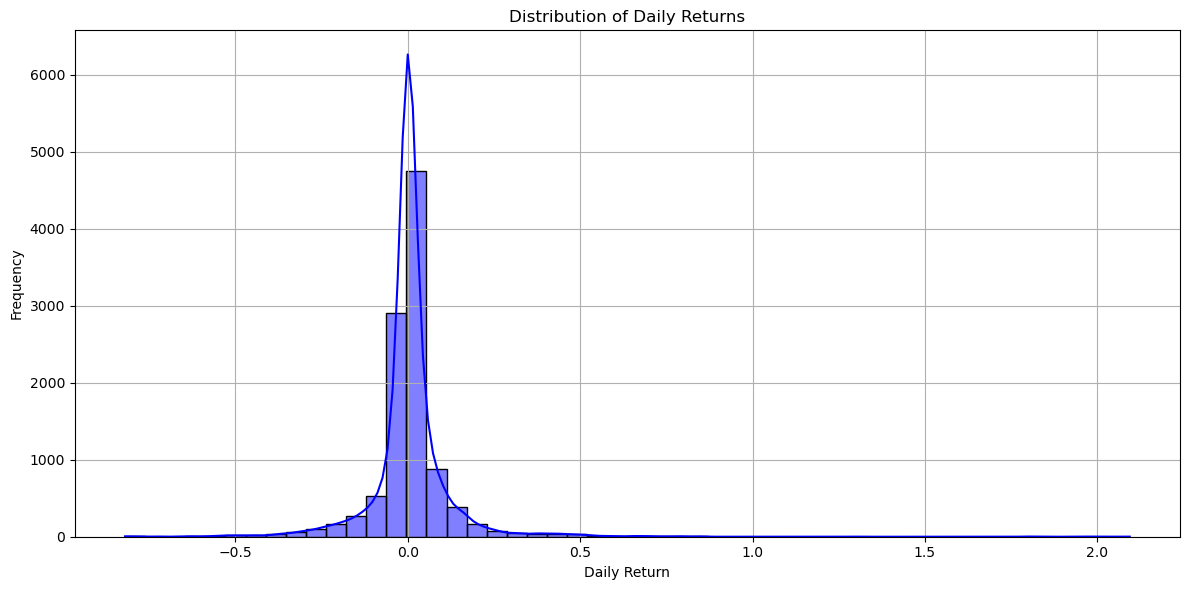

Mean Daily Return: 0.0070
Standard Deviation of Daily Returns: 0.1198
Annualized Volatility: 1.9015


In [24]:
# Calculation of daily returns
df['Daily Returns'] = df['Adj Close'].pct_change().dropna()

# Dropping NA values created by pct_change()
df = df.dropna()

# Plotting distribution of daily returns
plt.figure(figsize=(12, 6))

# Histogram with KDE
sns.histplot(df['Daily Returns'], kde=True, bins=50, color='blue',
             edgecolor='black')

# Formatting
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Calculating and printing risk metrics
mean_return = df['Daily Returns'].mean()
std_dev_return = df['Daily Returns'].std()
annual_volatility = std_dev_return * np.sqrt(252)  # Assuming 252 trading days in a year

print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Standard Deviation of Daily Returns: {std_dev_return:.4f}")
print(f"Annualized Volatility: {annual_volatility:.4f}")


# Correlation Heatmap

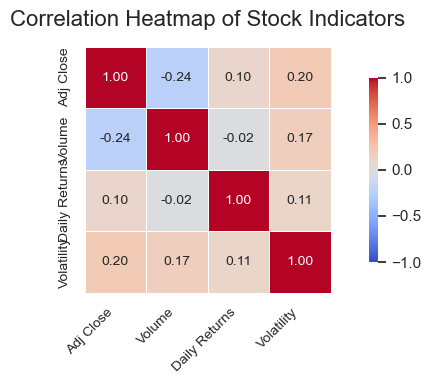

In [26]:
# Select Relevant Features
relevant_columns = ['Adj Close', 'Volume', 'Daily Returns', 'Volatility']
corr_data = df[relevant_columns].copy()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Heatmap customization
plt.figure(figsize=(8, 4))  
sns.set(style='whitegrid')  

heatmap = sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
    linewidths=0.5,  cbar_kws={'shrink': 0.75},
    vmin=-1, vmax=1, square=True, annot_kws={"size": 10}
)

# Customizing the title and adjusting layout
plt.title('Correlation Heatmap of Stock Indicators', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)  

plt.tight_layout() 
plt.show()
